In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
import random
import matplotlib.pyplot as plt

#1. Best and worst cases

In [ ]:
def emparejar(man_list,menPreference,women_list,womenPreference):
  
  women_df=pd.DataFrame(womenPreference, index = man_list, columns = women_list)
  man_df = pd.DataFrame(menPreference, index = man_list, columns = women_list)

  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0

  # while not all men have pairs
  while len(waiting_list)<len(man_list):

      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1
  #print(proposals)
  return count


In [ ]:
def worstCaseMen(n):
  womens = list(range(1,n+1))
  preferences = []
  preferences.append(womens)

  for i in range(n-1):
    womens = womens[-2:-1] + womens[:-2] + womens[-1:]
    preferences.append(womens)
  return preferences

def worstCaseWomen(n):
  mens = list(range(n,0,-1))
  mens[0] = n
  preferences = []
  preferences.append(mens) 

  for i in range(n-1):
    mens = mens[-1:] + mens[:-1]
    preferences.append(mens)
  return preferences

def namesMin(n):
  ch1=65
  cont=1
  names=[]
  for _ in range(n):
    if ch1>90:
      ch1=65
      cont+=1
    names.append(chr(ch1)*cont)
    ch1+=1
  return names

def namesMay(n):
  ch1=97
  cont=1
  names=[]
  for _ in range(n):
    if ch1>122:
      ch1=97
      cont+=1
    names.append(chr(ch1)*cont)
    ch1+=1
  return names



In [ ]:
n=4
men=worstCaseMen(n);
women=worstCaseWomen(n);
print(emparejar(namesMin(n),men,namesMay(n),women))

[('B', 'a'), ('C', 'b'), ('D', 'c'), ('A', 'd')]


In [ ]:
#worst case women
pd.DataFrame(women, index = namesMin(n), columns = namesMay(n))

,a,b,c,d
A,4,3,2,1
B,1,4,3,2
C,2,1,4,3
D,3,2,1,4


In [ ]:
#worst case men
pd.DataFrame(men, index = namesMin(n), columns = namesMay(n))

,a,b,c,d
A,1,2,3,4
B,3,1,2,4
C,2,3,1,4
D,1,2,3,4


In [ ]:
n=40
men=worstCaseMen(n);
women=worstCaseWomen(n);
print(emparejar(namesMin(n),men,namesMay(n),women))

[('B', 'a'), ('C', 'b'), ('D', 'c'), ('E', 'd'), ('F', 'e'), ('G', 'f'), ('H', 'g'), ('I', 'h'), ('J', 'i'), ('K', 'j'), ('L', 'k'), ('M', 'l'), ('N', 'm'), ('O', 'n'), ('P', 'o'), ('Q', 'p'), ('R', 'q'), ('S', 'r'), ('T', 's'), ('U', 't'), ('V', 'u'), ('W', 'v'), ('X', 'w'), ('Y', 'x'), ('Z', 'y'), ('AA', 'z'), ('BB', 'aa'), ('CC', 'bb'), ('DD', 'cc'), ('EE', 'dd'), ('FF', 'ee'), ('GG', 'ff'), ('HH', 'gg'), ('II', 'hh'), ('JJ', 'ii'), ('KK', 'jj'), ('LL', 'kk'), ('MM', 'll'), ('NN', 'mm'), ('A', 'nn')]


In [ ]:
#worst case women
pd.DataFrame(women, index = namesMin(n), columns = namesMay(n))

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,bb,cc,dd,ee,ff,gg,hh,ii,jj,kk,ll,mm,nn
A,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1
B,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2
C,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3
D,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4
E,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5
F,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6
G,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7
H,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8
I,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9
J,9,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10


In [ ]:
#worst case men
pd.DataFrame(men, index = namesMin(n), columns = namesMay(n))

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,bb,cc,dd,ee,ff,gg,hh,ii,jj,kk,ll,mm,nn
A,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
B,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40
C,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,40
D,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,40
E,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,40
F,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,40
G,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,40
H,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,40
I,32,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,40
J,31,32,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,40


In [ ]:
def bestCase(n):
  todos=list(range(1,n+1))
  preferences=[]
  for _ in range(n):
    preferences.append(todos)
    todos=todos[-1:]+todos[:-1]
  return preferences

bestCase(4)

[[1, 2, 3, 4], [4, 1, 2, 3], [3, 4, 1, 2], [2, 3, 4, 1]]

In [ ]:
n=4
men=bestCase(n)
women=men
emparejar(namesMin(n),men,namesMay(n),women)

[('A', 'a'), ('B', 'b'), ('C', 'c'), ('D', 'd')]

In [ ]:
#best case women
pd.DataFrame(women, index = namesMin(n), columns = namesMay(n))

,a,b,c,d
A,1,2,3,4
B,4,1,2,3
C,3,4,1,2
D,2,3,4,1


In [ ]:
#best case men
pd.DataFrame(men, index = namesMin(n), columns = namesMay(n))

,a,b,c,d
A,1,2,3,4
B,4,1,2,3
C,3,4,1,2
D,2,3,4,1


In [ ]:
n=40
men=bestCase(n)
women=men
emparejar(namesMin(n),men,namesMay(n),women)

[('A', 'a'),
 ('B', 'b'),
 ('C', 'c'),
 ('D', 'd'),
 ('E', 'e'),
 ('F', 'f'),
 ('G', 'g'),
 ('H', 'h'),
 ('I', 'i'),
 ('J', 'j'),
 ('K', 'k'),
 ('L', 'l'),
 ('M', 'm'),
 ('N', 'n'),
 ('O', 'o'),
 ('P', 'p'),
 ('Q', 'q'),
 ('R', 'r'),
 ('S', 's'),
 ('T', 't'),
 ('U', 'u'),
 ('V', 'v'),
 ('W', 'w'),
 ('X', 'x'),
 ('Y', 'y'),
 ('Z', 'z'),
 ('AA', 'aa'),
 ('BB', 'bb'),
 ('CC', 'cc'),
 ('DD', 'dd'),
 ('EE', 'ee'),
 ('FF', 'ff'),
 ('GG', 'gg'),
 ('HH', 'hh'),
 ('II', 'ii'),
 ('JJ', 'jj'),
 ('KK', 'kk'),
 ('LL', 'll'),
 ('MM', 'mm'),
 ('NN', 'nn')]

In [ ]:
#best case women
pd.DataFrame(women, index = namesMin(n), columns = namesMay(n))

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,bb,cc,dd,ee,ff,gg,hh,ii,jj,kk,ll,mm,nn
A,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
B,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
C,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
D,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
E,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
F,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
G,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
H,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
I,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
J,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31


In [ ]:
#best case men
pd.DataFrame(men, index = namesMin(n), columns = namesMay(n))

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,bb,cc,dd,ee,ff,gg,hh,ii,jj,kk,ll,mm,nn
A,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
B,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
C,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
D,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
E,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
F,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
G,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
H,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
I,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
J,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31


In [ ]:
def get_ranking_matrix(preference):
    rank = [[None for j in range(len(preference))] for i in range(len(preference))]

    for i in range(len(preference)):
        for j in range(len(preference[i])):
            rank[i][preference[i][j]] = j
    
    return rank

def stable_roommates_phase_1(preference, rank):
    proposal = [None for x in range(len(preference))]
    first = [0 for x in range(len(preference))]
    last = [len(x) for x in preference]
    to_process = [x for x in range(len(preference))]
    
    while len(to_process) > 0:
        i = to_process[0]
        
        # update first pointer if necessary
        while preference[i][first[i]] == None:
            first[i] += 1
            
        top_pick = preference[i][first[i]]
        
        # top pick hasn't been proposed to yet, so they accept
        if proposal[top_pick] == None:
            proposal[top_pick] = i
            
            match_rank = preference[top_pick].index(i)
            
            # all candidates worse than i are rejected, must remove top_pick from their preference list
            for x in range(match_rank+1, last[top_pick]):
                reject = preference[top_pick][x]
                #preference[reject][rank[reject][top_pick]] = None
            
            # update last pointer
            last[top_pick] = match_rank
            del to_process[0]
            
            continue
        
        curr_match_idx = rank[top_pick][proposal[top_pick]]
        potential_match_idx = rank[top_pick][i]
        
        if curr_match_idx < potential_match_idx: # current matching is preferred, i is rejected
            preference[top_pick][potential_match_idx] = None
            
            first[i] += 1 # start at next spot
            
            continue
        else: # accept proposal, so old match has to return to their preference list again
            preference[top_pick][curr_match_idx] = None
            
            # old match is rejected by top_pick, must update their list
            top_pick_idx = rank[proposal[top_pick]][top_pick]
            preference[proposal[top_pick]][top_pick_idx] = None
            
            del to_process[0]
            # add old match to to_process
            to_process.insert(0, proposal[top_pick])
            
            proposal[top_pick] = i
            last[top_pick] = potential_match_idx
    
    return first, last, preference

def clean_preferences(first, last, preferences):
    for i in range(len(preferences)):
        for j in range(len(preferences[i])):
            if j < first[i] or j > last[i]:
                preferences[i][j] = None

    return preferences

def find_second_favorite(i, first, last, pref):
    count = 0
    for j in range(first[i], last[i]+1):
        if not pref[j] == None:
            count += 1
        elif count == 0:
            first[i] += 1
        if count == 2:
            return pref[j]
    return None

def find_rotation(i, p, q, first, last, preferences):
    second_favorite = find_second_favorite(p[i], first, last, preferences[p[i]])
    next_p = preferences[second_favorite][last[second_favorite]]
    
    if next_p in p:
        # rotation found!
        j = p.index(next_p)
        q[j] = second_favorite
                
        return p[j:], q[j:]

    q.append(second_favorite)
    p.append(next_p)
    return find_rotation(i+1, p, q, first, last,  preferences)

def eliminate_rotation(p, q, first, last, preferences, rank):
    for i in range(len(p)):
        # q_i rejects p_i so that p_i proposes to q_i+1
        preferences[p[i]][rank[p[i]][q[i]]] = None
        
        # all successors of p_i-1 are removed from q_i's list, and q_i is removed from their lists
        for j in range(rank[q[i]][p[i-1]]+1, last[q[i]]):
            reject = rank[q[i]].index(j) #preferences[q[i]][j]
            preferences[reject][rank[reject][q[i]]] = None
            
        last[q[i]] = rank[q[i]][p[i-1]]

def stable_roommates_phase_2(first, last, preferences, rank):
    while True:
        p, q = None, None
        # find first p_0 to get a rotation from
        # preference list of p_0 must contain at least 2 elements
        for i in range(len(preferences)):
            if last[i] - first[i] > 0 and find_second_favorite(i, first, last, preferences[i]) != None:
                p, q = find_rotation(0, [i], [None], first, last, preferences)
                break
        
        if not p and not q:
            return preferences
        
        # eliminate rotation
        eliminate_rotation(p, q, first, last, preferences, rank)

def match_roommates(preferences):
    rank = get_ranking_matrix(preferences)
    first, last, preferences = stable_roommates_phase_1(preferences, rank)
    stable_roommates_phase_2(first, last, preferences, rank)
    clean_preferences(first, last, preferences)
    
    matches = []
    length = len(preferences)
    visited = set()
    i = 0
    
    for i in range(len(preferences)):
        if not i in visited:
            pair = (i, preferences[i][last[i]])
            visited.add(last[i])
            matches.append(pair)
    
    return matches



In [ ]:
def bestCaseIrving(n):
  preferences = []
  all=range(n)
  for i in range(n):
    copy=all[:]
    copy.pop(i)
    if (i%2 == 0):
      copy.insert(0,copy.pop(i))
    else:
      copy.insert(0,copy.pop(i-1))
    preferences.append(copy)
  return preferences

In [ ]:
match_roommates( bestCaseIrving(4))

[(0, 1), (1, 0), (2, 3), (3, 2)]

In [ ]:
match_roommates(bestCaseIrving(40))

[(0, 1),
 (1, 0),
 (2, 3),
 (3, 2),
 (4, 5),
 (5, 4),
 (6, 7),
 (7, 6),
 (8, 9),
 (9, 8),
 (10, 11),
 (11, 10),
 (12, 13),
 (13, 12),
 (14, 15),
 (15, 14),
 (16, 17),
 (17, 16),
 (18, 19),
 (19, 18),
 (20, 21),
 (21, 20),
 (22, 23),
 (23, 22),
 (24, 25),
 (25, 24),
 (26, 27),
 (27, 26),
 (28, 29),
 (29, 28),
 (30, 31),
 (31, 30),
 (32, 33),
 (33, 32),
 (34, 35),
 (35, 34),
 (36, 37),
 (37, 36),
 (38, 39),
 (39, 38)]

In [ ]:
def worstCaseIrving(n):
  preferences=[]
  all=range(n)


#2. 100 random mariages

In [ ]:
def randomCases(n):
  all=list(range(1,n+1))
  cases=[]
  for _ in range(n):
    copy=all[:]
    random.shuffle(copy)
    cases.append(copy)
    
  return cases

Maximo:  138
Minimo:  9
Promedio:  46.47


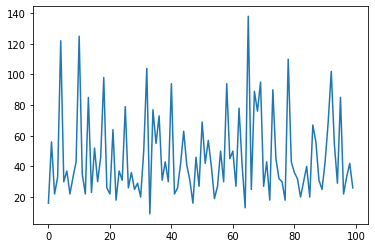

In [ ]:
n=40
minus=namesMin(n)
mayus=namesMay(n)

data=[]
for _ in range(100):
  data.append(emparejar(minus,randomCases(n),mayus,randomCases(n)))

print("Maximo: ",max(data))
print("Minimo: ",min(data))
print("Promedio: ", sum(data)/100)
plt.plot(data)
